<a href="https://colab.research.google.com/github/nishkarsh25/minimum-time-in-mess/blob/main/minimumtimeinmess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
import pandas

5
2.5


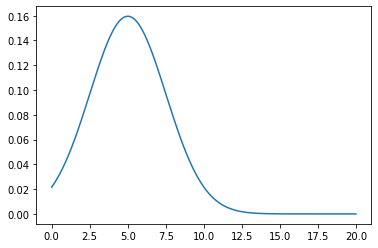

In [ ]:
entryrate = np.arange(0, 20, 0.01)
mean1 = 5
sd1 = 2.5
print(mean1)
print(sd1)
plt.plot(entryrate, norm.pdf(entryrate, mean1, sd1))
plt.show()

4
2


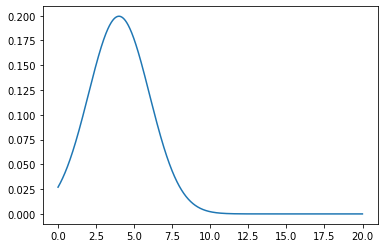

In [ ]:
servicerate = np.arange(0, 20, 0.01)
mean2 = 4
sd2 = 2
print(mean2)
print(sd2)
plt.plot(servicerate, norm.pdf(servicerate, mean2, sd2))
plt.show()

8
4


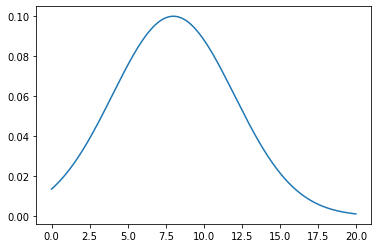

In [ ]:
eatingtime = np.arange(0, 20, 0.01)
mean3 = 8
sd3 = 4
print(mean3)
print(sd3)
plt.plot(eatingtime, norm.pdf(eatingtime, mean3, sd3))
plt.show()

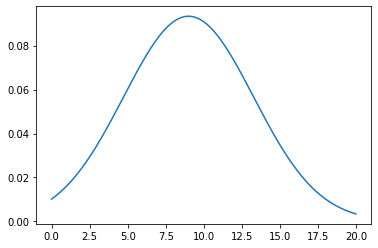

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu=mean1-mean2+mean3
variance=sd1*sd1-sd2*sd2+sd3*sd3
sigma = math.sqrt(variance)
minimumtime = np.arange(0, 20, 0.01)
plt.plot(minimumtime, stats.norm.pdf(minimumtime, mu, sigma))
plt.show()